Python 練功房
===

示範
- <a href="#丢丟銅">電腦音樂: 宜蘭民謠 丢丟銅</a>
- <a href="#紙飛機"> 紙飛機</a>
- <a href="#登月任務">登月任務</a>

丢丟銅
---

In [1]:
# 加入函式庫和函數
from IPython.display import Audio
from numpy import pi,sin,exp,cos
import numpy as np

In [2]:
# 定義音階
A,B, C, D, E, F, G, A5, B5, C5,D5,E5,F5,G5,A6,B6, C6 = 57,59,\
          60, 62, 64, 65, 67, 69, 71, 72,74,76,77,79,81,83,84
scale = [C, D, E, F, G, A, B, C5 ,D5, E5,F5,G5,A6,B6,C6 ]

In [3]:
def sine_env(t):
    return sin(pi*t/t[-1]) #t[-1] = last value

In [4]:
def flute_env(t):
    return sin(pi*t/t[-1])**0.4

In [5]:
# 歌曲
train=[(D5,1),(E5,1), (D5,1/2),(E5,1/2),(D5,1/2),(C5,1/2),
       (D5,1/2),(E5,1/4),(E5,1/4),(D5,1/2),(C5,1/2),(D5,1),(C5,1/2),(A5,1/2),
       (G,1/2),(G,1/2),(A5,1/2),(C5,1/2),(G,2),
       (A5,1),(D5,1),(A5,1/2),(C5,1/2),(C5,1/2),(A,1/2),
       (D5,1/2),(C5,1/4),(D5,1/2),(C5,1/4),
       (A5,1/2),(C5,1/2),(A5,1/2),(C5,1/2),
       (G,1/2),(G,1/4),(G,1/4),(G,1/2),(G,1/2),
       (A5,1/2),(C5,1/2),(A5,1/2),(G,1/2),(D,3/2),(A5,1/2),(G,2)]


In [6]:
# Solo by flute
BaseNote = 466.16
Fs = 44100
sound = []
for note in train:
    fnum, dur = note
    t = np.linspace(0,dur/2,dur/2*Fs)
    f = BaseNote * 2**((fnum-69)/12)
    sinusoid = sin(2*pi*f*t)
    #sound.append(guitar_env(t) * sinusoid)
    sound.append(flute_env(t) * sinusoid)
train_guitar_sound = np.concatenate(sound)
Audio(train_guitar_sound, rate=Fs)

紙飛機
---

In [7]:
# 加入製圖函式庫
%matplotlib inline
from scipy.integrate import ode,odeint
import matplotlib.pylab as plt
from matplotlib import animation
from JSAnimation import IPython_display

In [8]:
# 定義參數
F=0
R=0.2
h0=2

theta0=0
v0=5.

t = np.linspace(0, 20, 2000)

In [9]:
# 時間軌跡計算
def dx(x, t):
    """
    The right-hand side of the pendulum ODE
    (v,theta,x,y)
    """
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = -sin(x2)-R*x1*x1+F
    dx2 = (x1*x1-cos(x2))/x1
    
    dx3 = x1*cos(x2)
    dx4 = x1*sin(x2)
    
    return [dx1, dx2, dx3, dx4]

In [10]:
# 初始值
theta0Rad=theta0/180.*pi
x0 = [v0,theta0Rad,0,h0]

In [11]:
# 計算飛行軌跡
x = odeint(dx, x0, t)

In [12]:
# 計算何時落地
distanceI=(x[:,3]>0)
y=x[:,3].clip(0)
TavelTime=sum(distanceI)

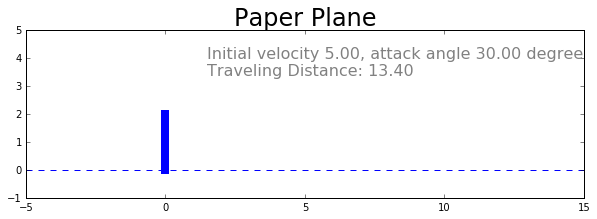

In [13]:
# 動畫
theta0=30
v0=5.

ratio=20
anim = plt.figure(figsize=(10,3))
ax = anim.add_subplot(111)
ax.set_title("Paper Plane",fontsize=14)

plt.ylim([-1,h0+3])
plt.xlim([-5,15])
plt.plot([0,0],[0,h0],lw=8)
plt.plot([-5,15],[0,0],'--b')
plt.title('Paper Plane', size=24)
plt.text(1.5,4,'Initial velocity %2.2f, attack angle %2.2f degree' %(v0,theta0), size=16, color='grey')
plt.text(1.5,3.4, 'Traveling Distance: %2.2f' %x[TavelTime,2], size=16, color='grey')
def init():
    return None
def animate(i):
    if (i>0):
        dx=(x[i*ratio,2]-x[(i-1)*ratio,2])#/np.abs(x[i*ratio,2]-x[(i-1)*ratio,2])*0.4
        dy=(y[i*ratio]-y[(i-1)*ratio])#/np.abs(y[i*ratio]-y[(i-1)*ratio])*0.4
    else:
        dx=np.cos(theta0)*0.6;
        dy=np.sin(theta0)*0.6;
    return ax.plot(x[0:ratio*i:ratio,2],y[0:ratio*i:ratio],'--r'), \
        ax.arrow(x[i*ratio,2],y[i*ratio],dx,dy,color='red',head_width=0.4, head_length=0.4,alpha=0.3)


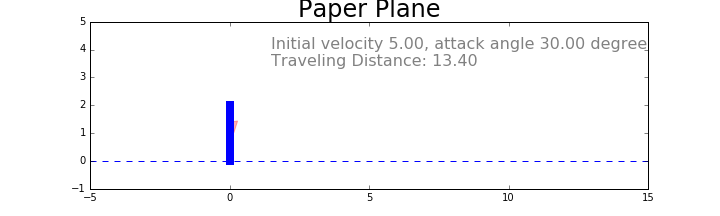
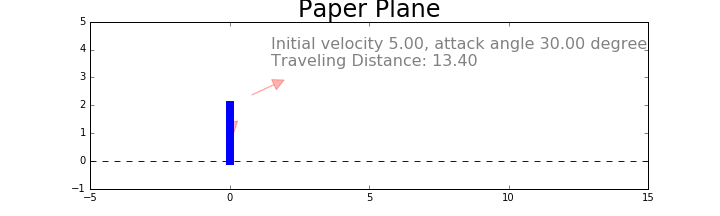
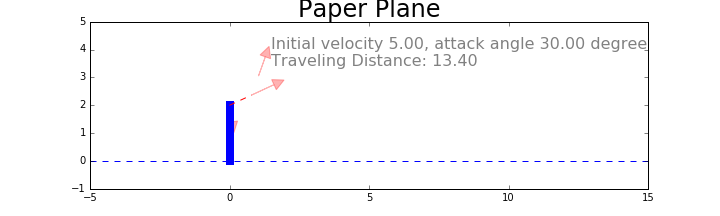
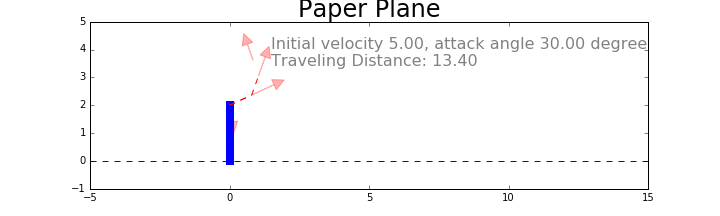
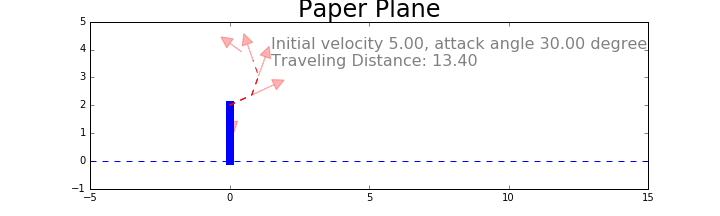
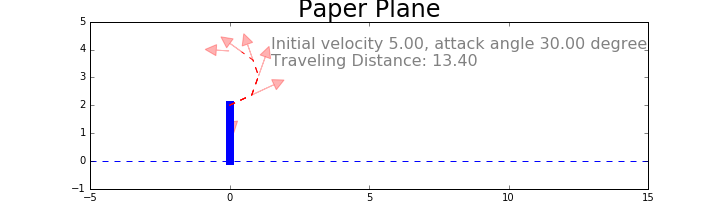
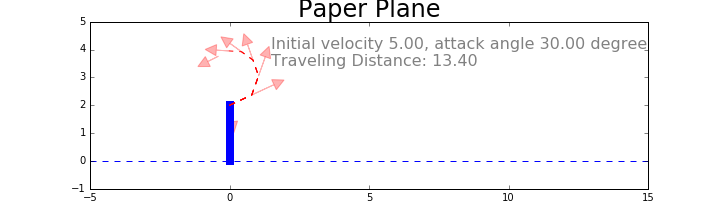
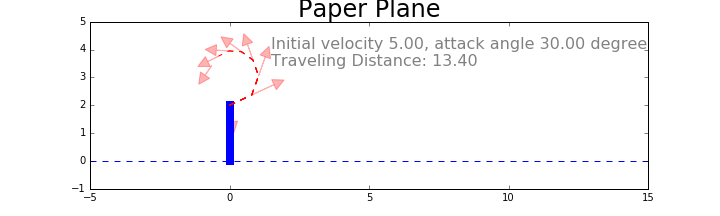
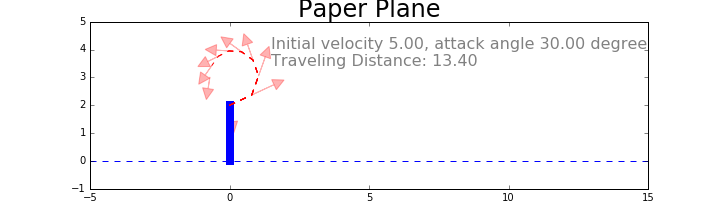
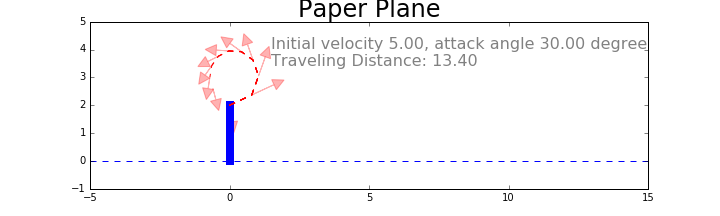
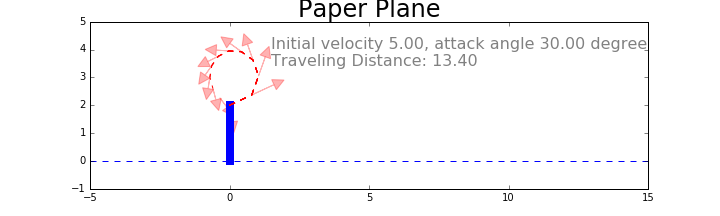
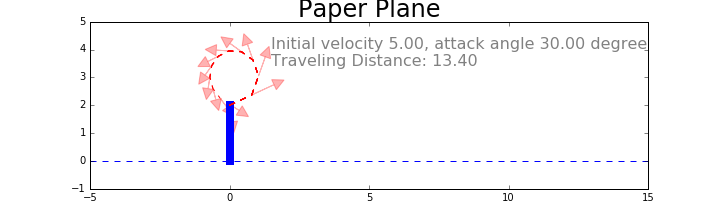
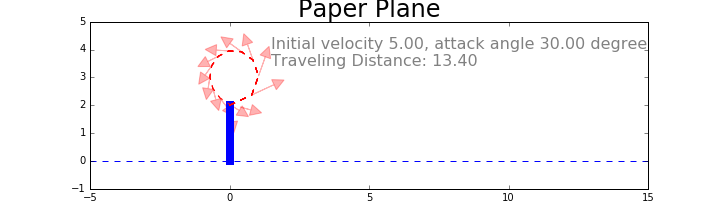
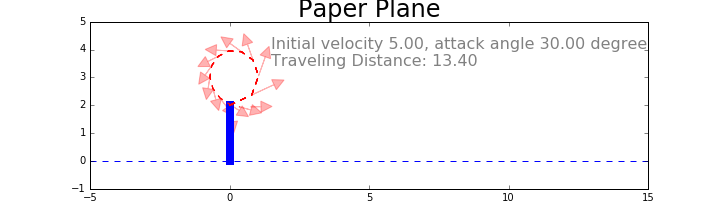
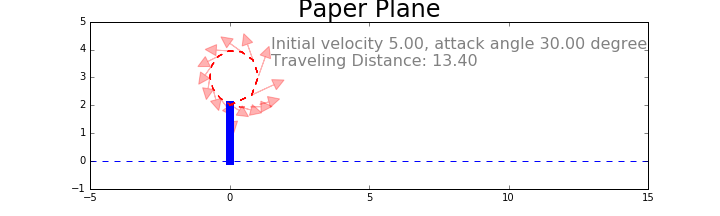
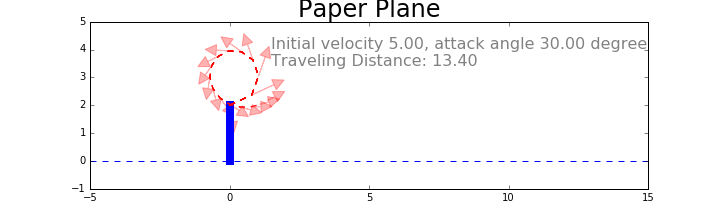
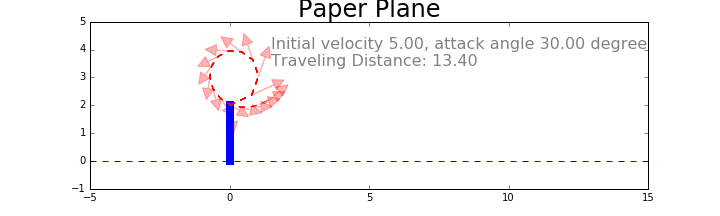
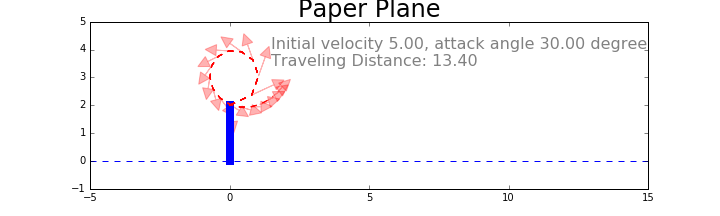
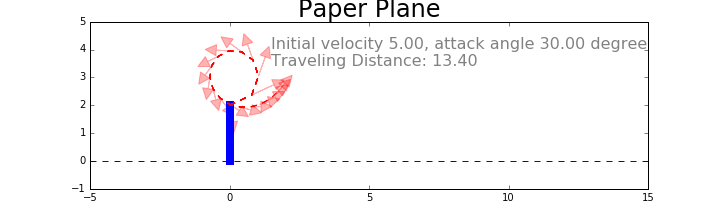
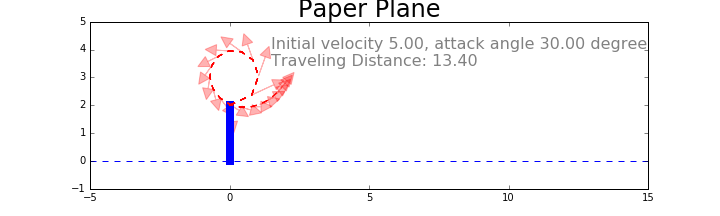
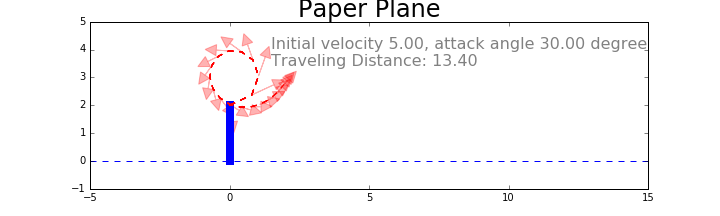
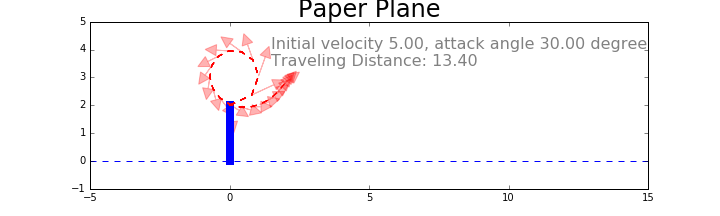
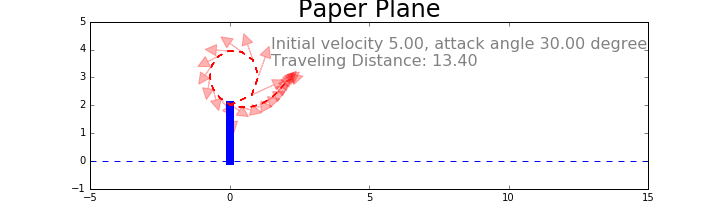
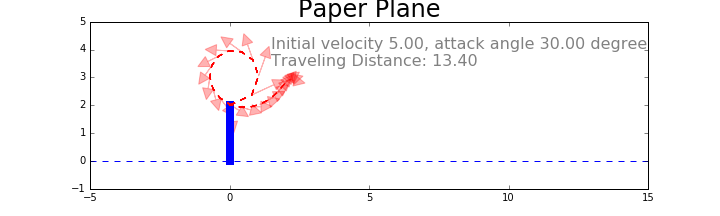
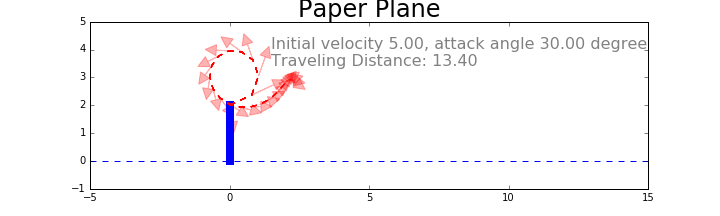
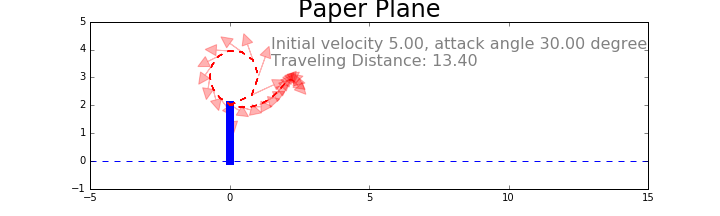
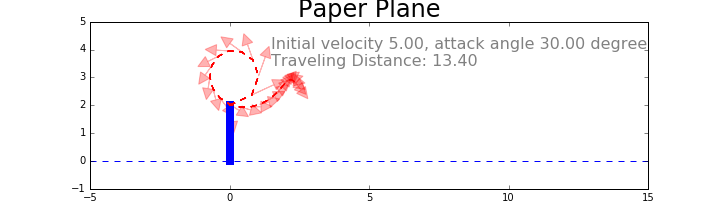
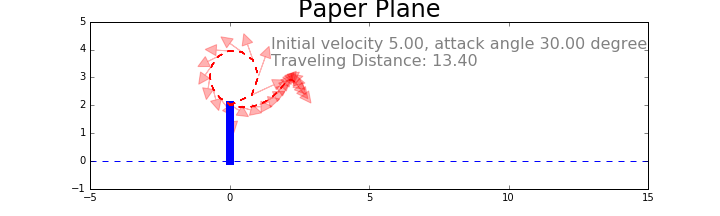
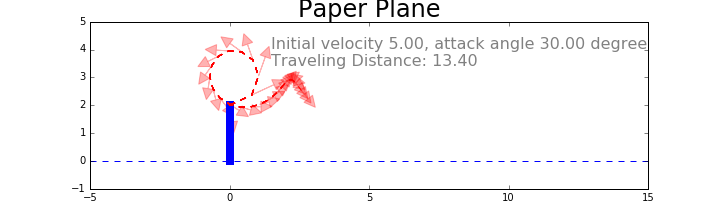
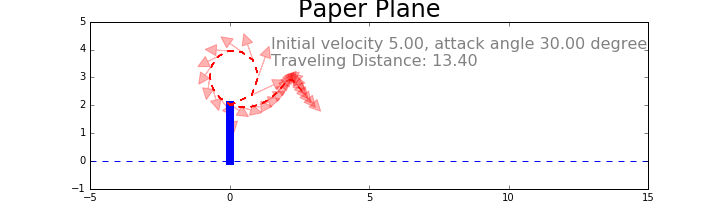
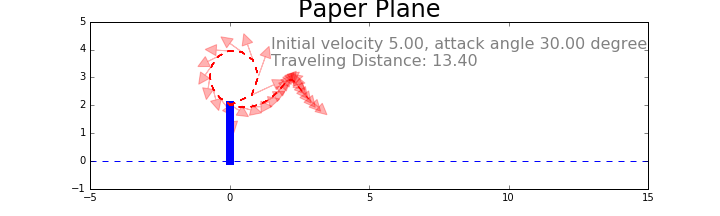
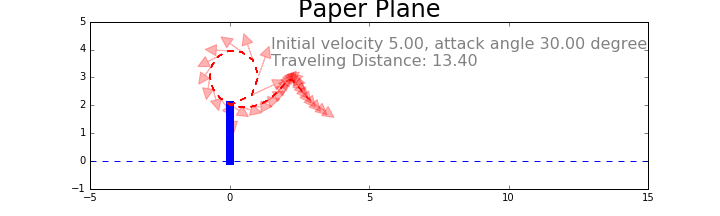
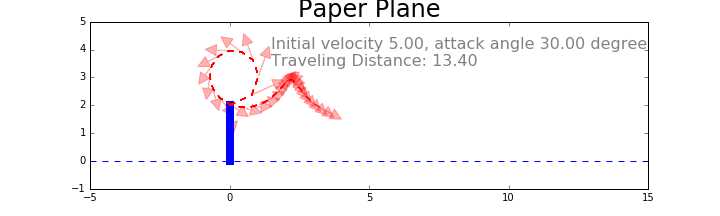
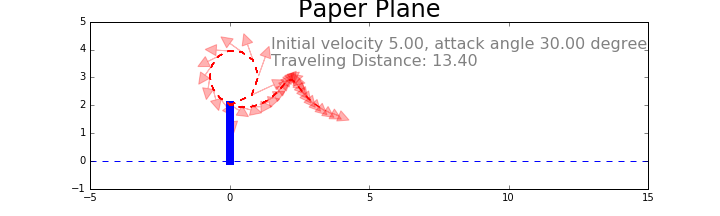
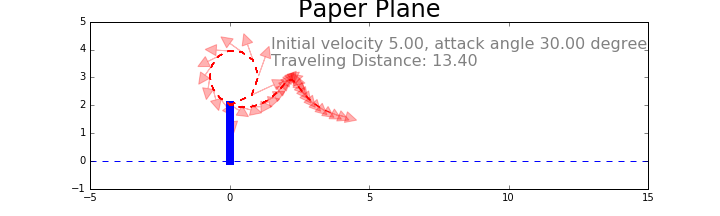
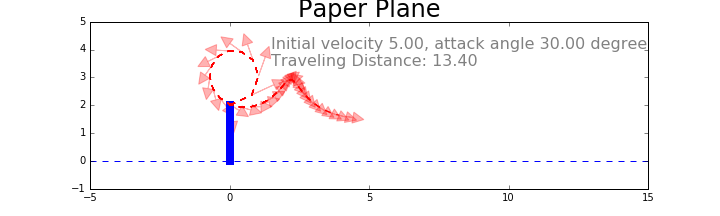
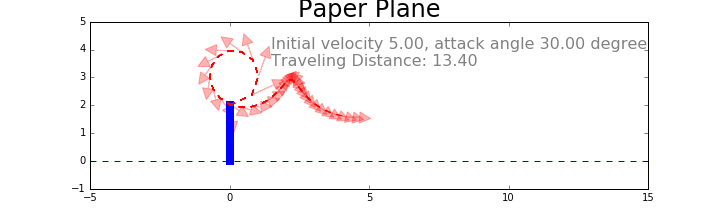
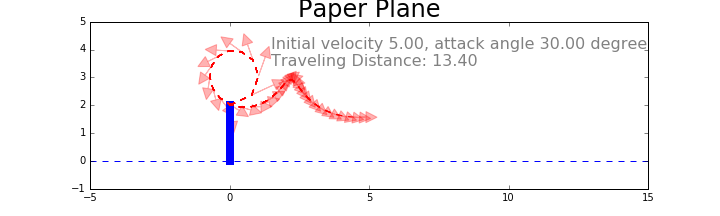
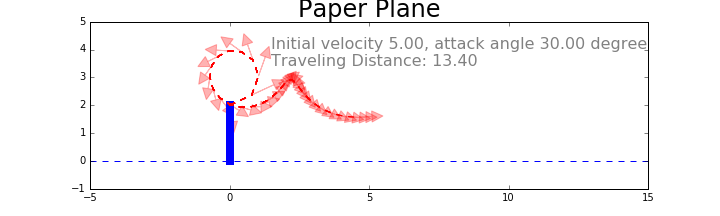
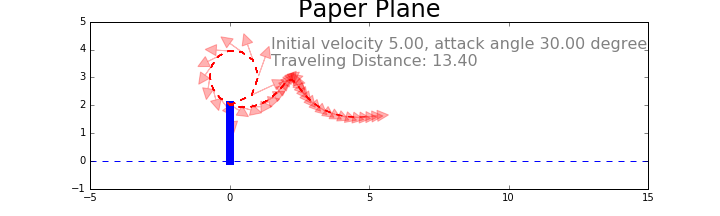
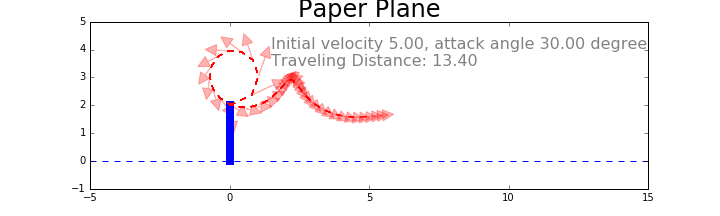
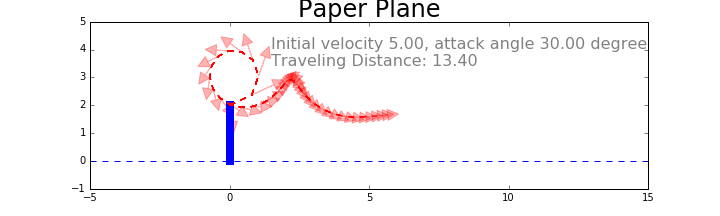
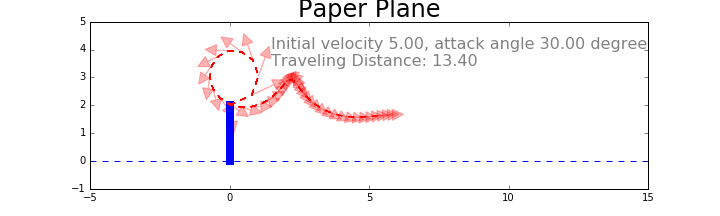
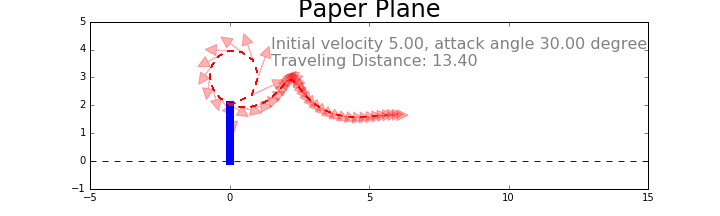
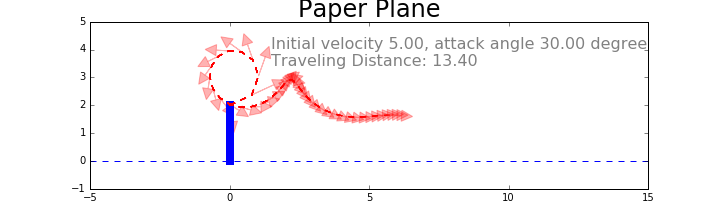
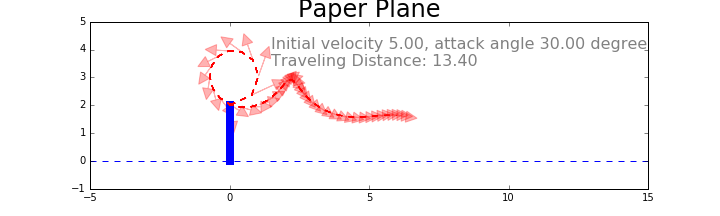
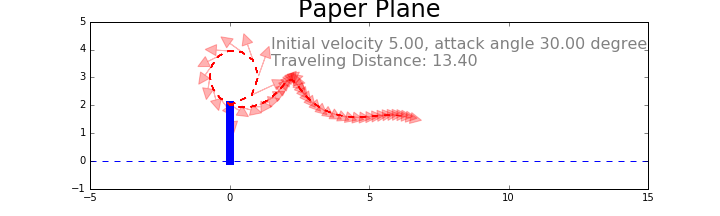
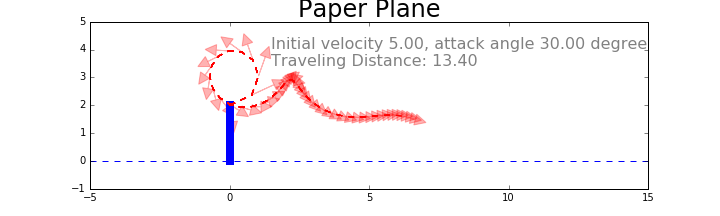
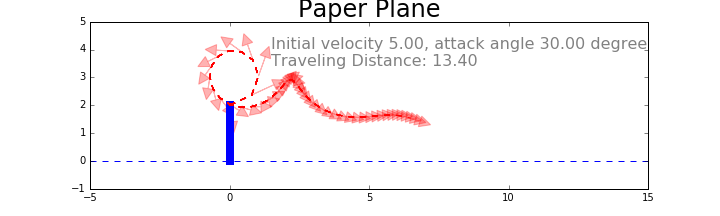
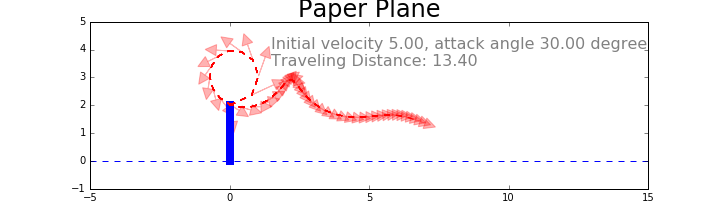
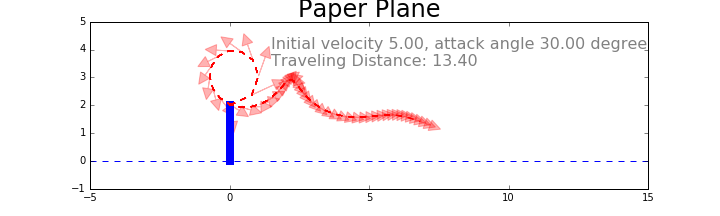
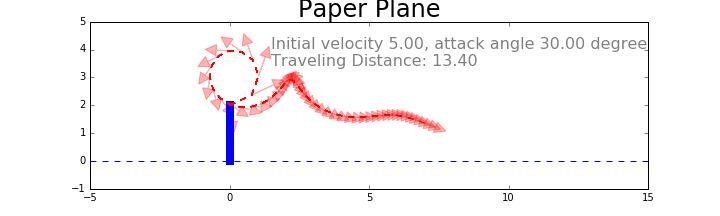
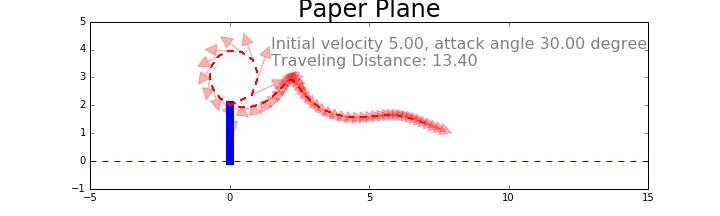
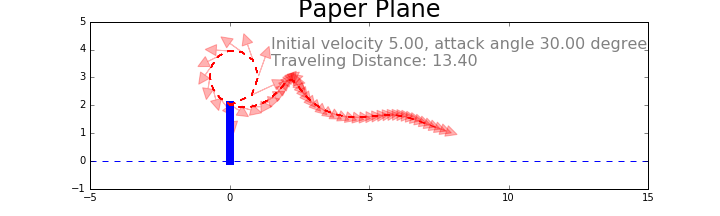
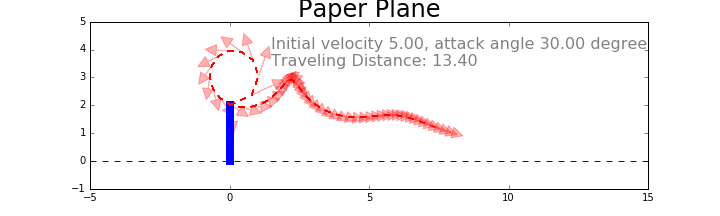
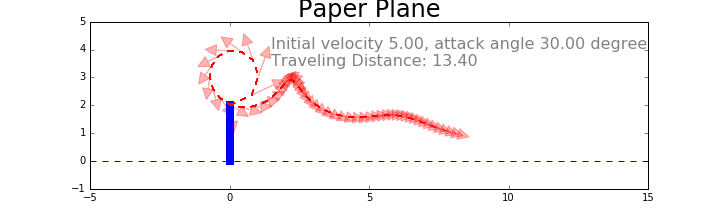
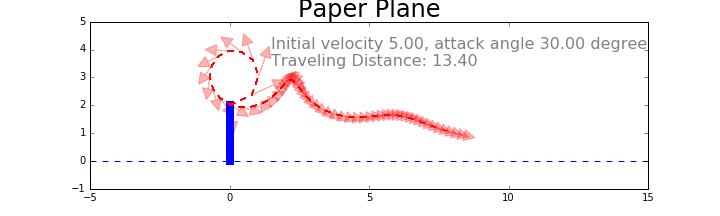
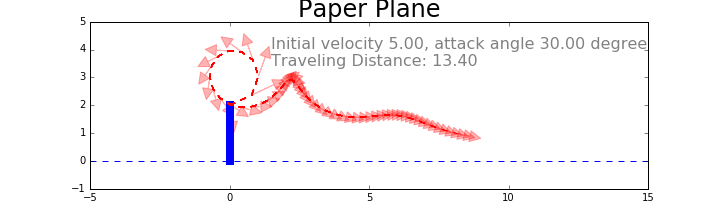
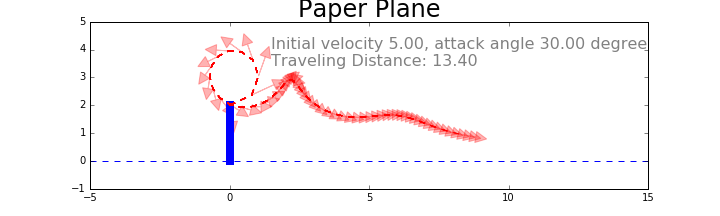
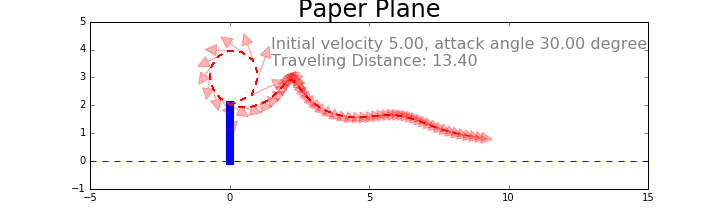
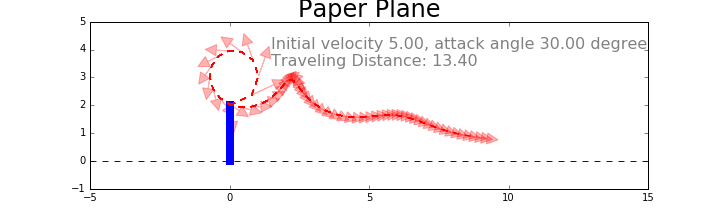
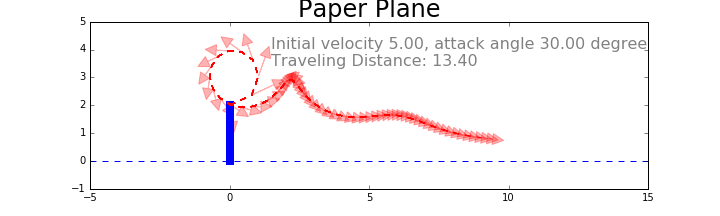
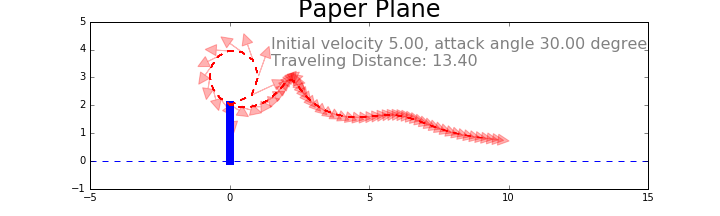
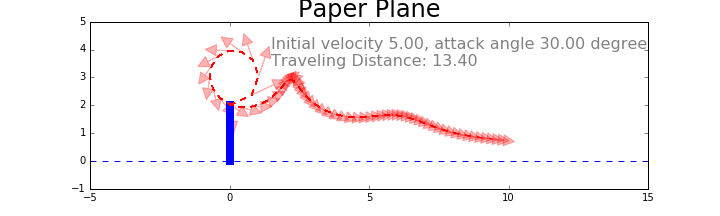
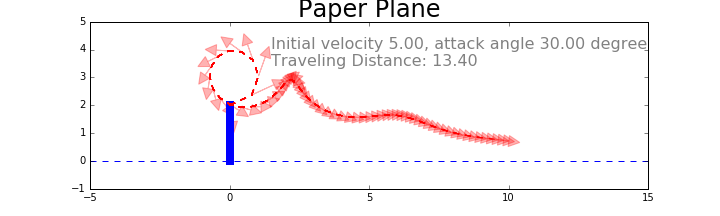
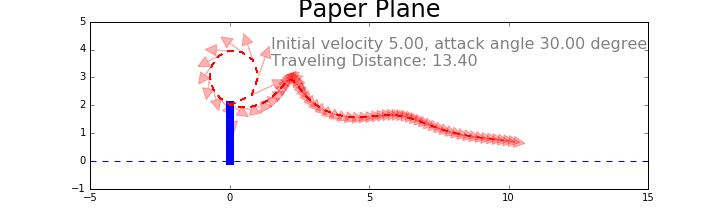
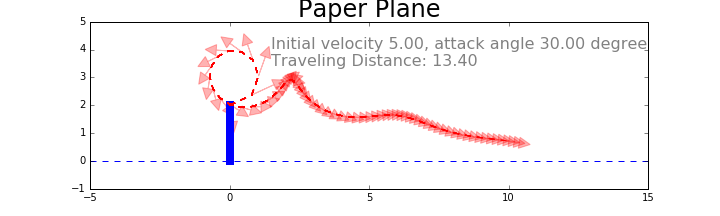
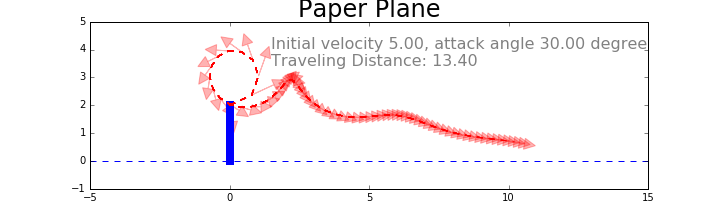
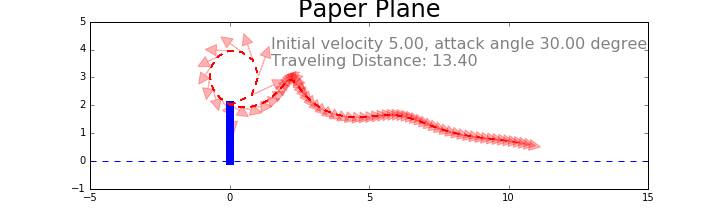
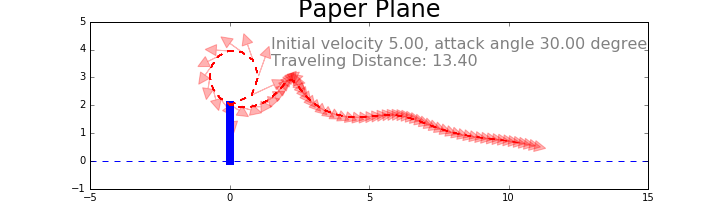
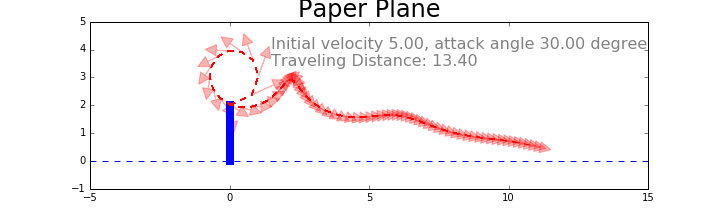
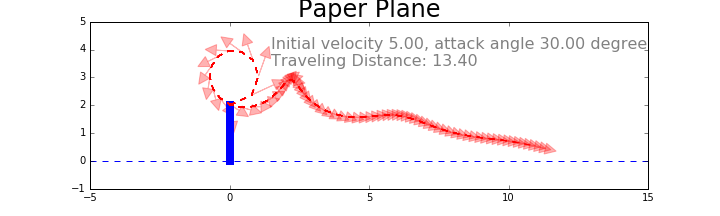
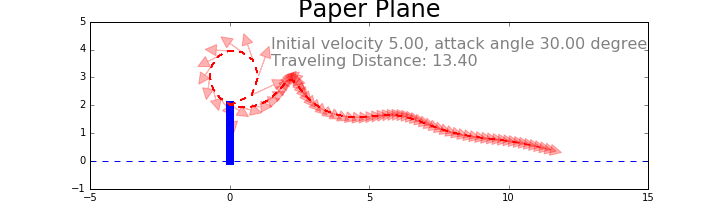
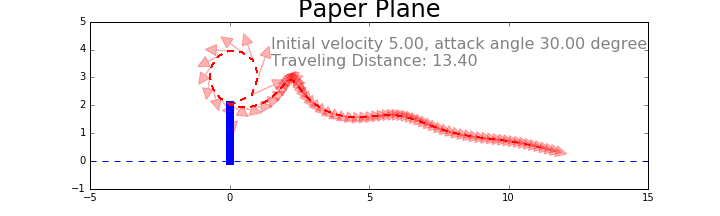
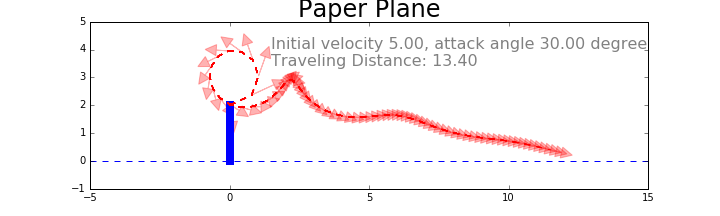
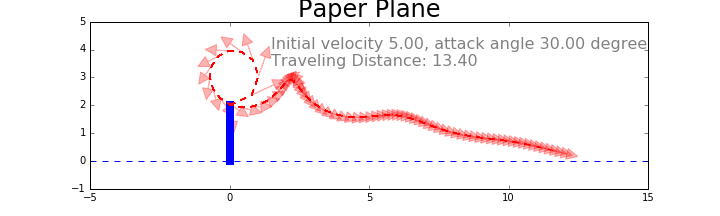
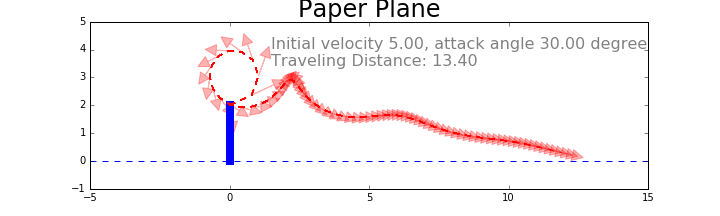
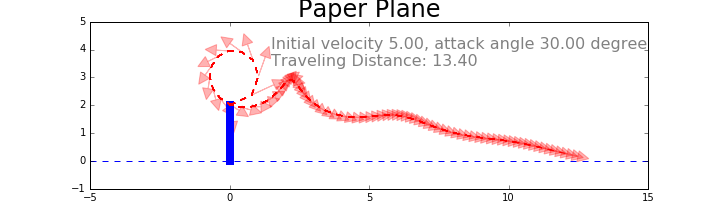
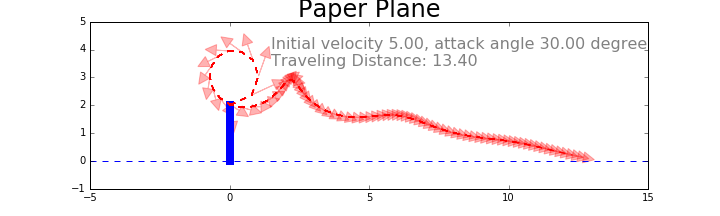
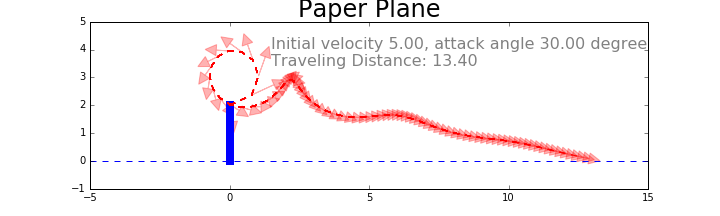
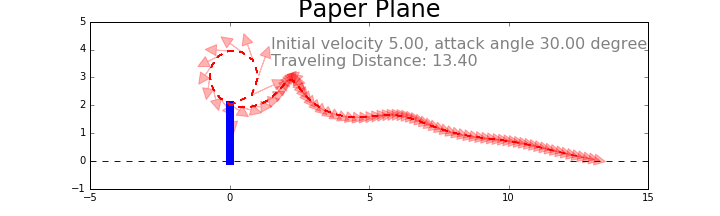
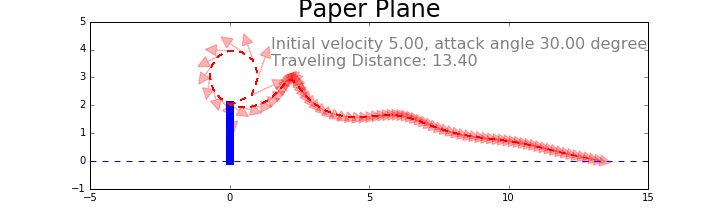

In [14]:
animation.FuncAnimation(anim, animate, init_func=init,frames=int(TavelTime/ratio))     

登月任務
---

In [15]:
# 補充額外的函式庫和函數
from numpy.linalg import norm
from matplotlib import animation
from ipywidgets import interact, FloatSlider

In [16]:
# 參數
Mpos=np.array([[1,0]])
Epos=np.array([[0,0]])
p=29.5
c=0.15
dt=0.1
i=1

In [17]:
# 月亮和太空船的軌跡計算
def MoonTraj(vec):
    c=vec
    Mpos=np.array([[1,0]])
    Epos=np.array([[0,0]])

    i=1
    #while Dpos[-1][1]<Mpos[0][1] or i<40:
    while i<800:
          Mpos1=np.array([cos(2*pi*i*dt/p),sin(2*pi*i*dt/p)])  
          Evel=c*(Mpos[-1]-Epos[-1])/norm(Mpos[-1]-Epos[-1])

          Epos2 = Epos[-1]+Evel*dt

          Mpos=np.vstack([Mpos,Mpos1])
          Epos=np.vstack([Epos,Epos2]) 
          i=i+1

    figM = plt.figure(figsize=(6,6))
    #ax = figM.add_subplot(111)
    plt.title("Moon Landing",size=14)

    plt.xlim([-1.1,1.1])
    plt.ylim([-1.1,1.1])
    plt.scatter(Mpos[:,0],Mpos[:,1], c='r' )
    plt.scatter(Epos[::4,0],Epos[::4,1],c='g')            
    plt.text(-0.5, -0.5,
            "Velocity of Spacecraft={0:.2f}".format(c),
            size=14, color='gray')       
            
    #return figM

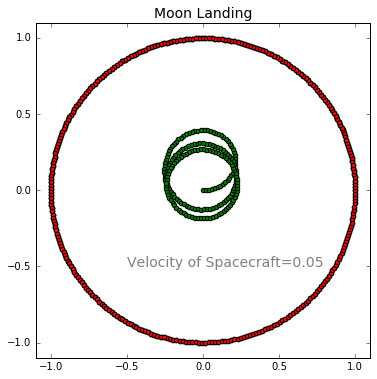

In [18]:
# 改變參數觀察太空登陸艇 (綠色軌跡) 如何才能登上月球(外圍的軌跡)
interact(MoonTraj,vec=FloatSlider(min=0.05, max=0.30, step=0.01))

In [26]:
!jupyter nbconvert demo.ipynb

[NbConvertApp] Converting notebook demo.ipynb to html
[NbConvertApp] Writing 4606809 bytes to demo.html
